In [3]:
### read information from a brw file

# import the file brw_experiment_settings from beaf framework, used to read information from brw files
import beaf.brw_experiment_settings as be

# create an object Info containing the information from the recording
# this does not extract any traces from the recording
Info = be.get_brw_experiment_setting("../recordings/13-10_hippo-slice3_gabazine17.brw")

# access and print information stored in the Info object
print(Info.get_mea_model())
print(Info.get_recording_type())
print(Info.get_nb_channel())
print(Info.get_sampling_rate())
print(Info.get_recording_length())
print(Info.get_recording_length_sec())

Accura_3D
RawDataSettings
4096
5543.99560546875
44352
8.000006341319962


Reading chunk 2 out of 2
done
Recording type: RawDataSettings


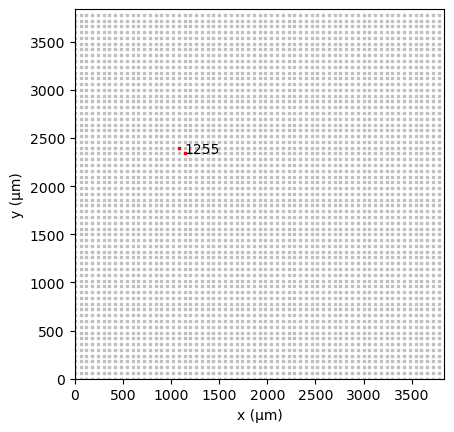

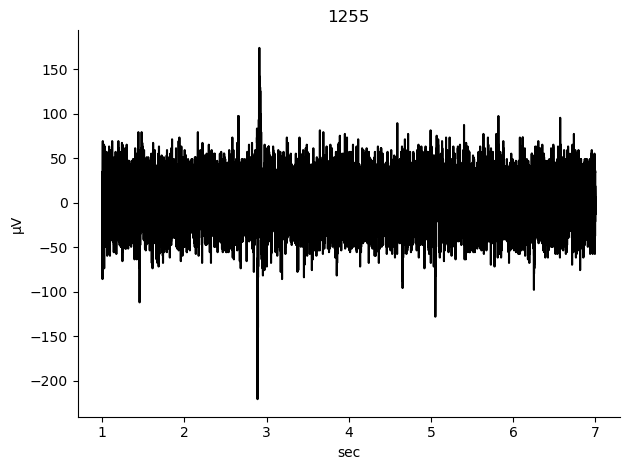

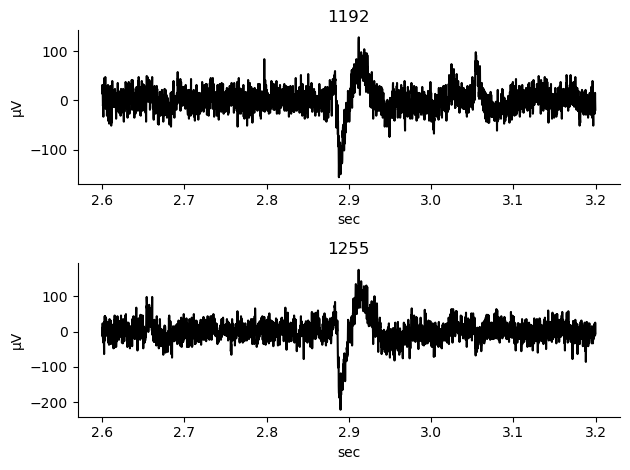

In [97]:
### read a recording from a brw file

# import the file brw_recording from beaf framework, used to read and extract recordings from brw files
import beaf.brw_recording as br

## raw format

# extract a recording from the brw file, from 1s to 7s, extracting the channels 1192 and 1255
Recording = br.read_brw_recording("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=1, t_end=7, ch_to_extract=[1192, 1255], verbose=True)

# a Recording object also contains an Info object
print("Recording type:", Recording.Info.get_recording_type())

# plot a map of the MEA
Recording.plot_mea(label=[1255], background=True)

# plot the raw signal of channels 1255
Recording.plot_raw([1255])
# plot the raw signal of channels 1192 and 1255 from 2.5s to 3.2s
Recording.plot_raw([1192, 1255], t_start=2.6, t_end=3.2)

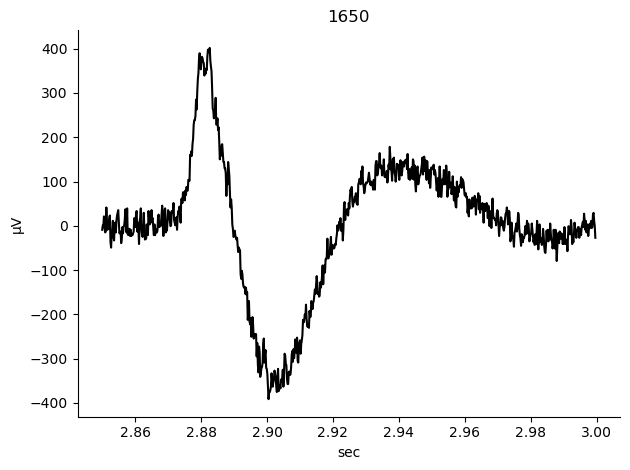

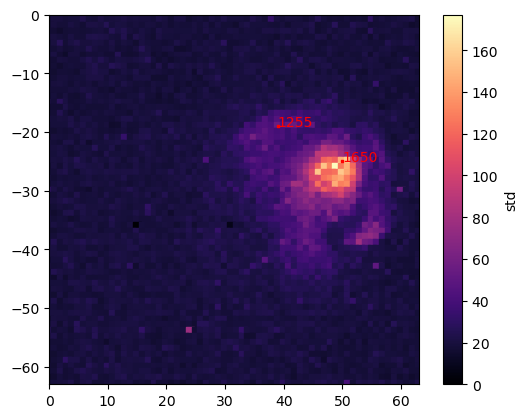

In [80]:
# extract all channels from the brw file, from 2.8s to 3s
Recording = br.read_brw_recording("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=2.85, t_end=3, ch_to_extract="all", verbose=True)

# plot the raw signal of channels 1650
Recording.plot_raw([1650])
# plot an activity map
Recording.plot_activity_map(label=[1255, 1650], method="std", cmap="magma")

In [70]:
# extract the whole recording from the brw file, extracting the channels 2098, and using the 3Brain dll
# Brainwave5 needs to be installed on this computer in order to use the 3Brain dlls
Recording = br.read_brw_recording("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=0, t_end=8, ch_to_extract=[2098], use_dll=True)


2 data chunks to read
Recording type: NoiseBlankingCompressionSettings


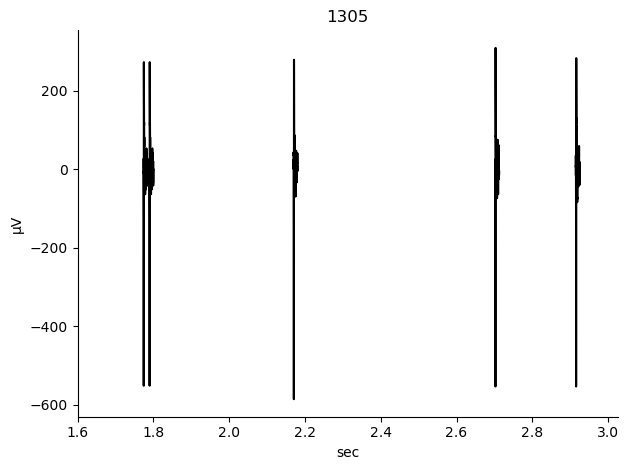

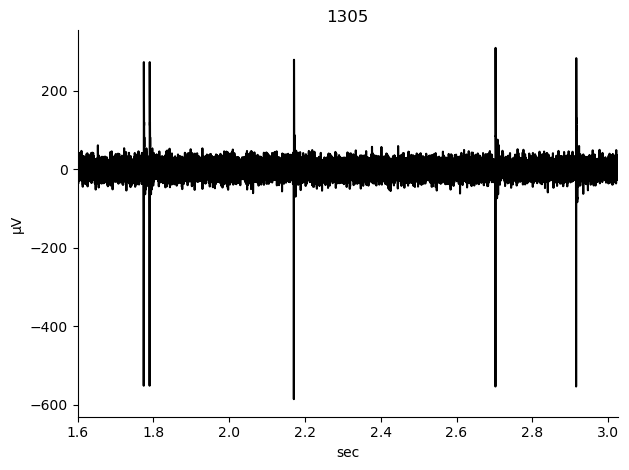

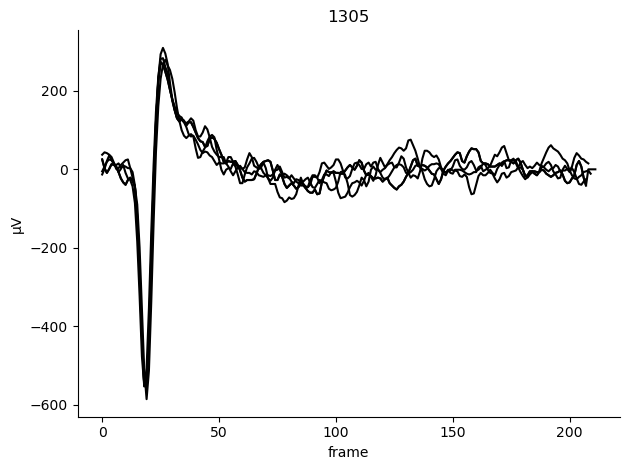

In [109]:
## raw compressed format

# extract a recording from the raw compressed brw file, from 1.6s to 2.95s, extracting all channels
Recording = br.read_brw_recording("../recordings/cerebellum-slice1-01.brw", t_start=1.6, t_end=2.95, ch_to_extract="all")
# print recording type
print("Recording type:", Recording.Info.get_recording_type())

# plot extracted signal for channel 1305. default visualisation mode is "aligned"
Recording.plot_raw([1305], t_start=1.6, t_end="all")
# plot extracted signal for channel 1305, with visualisation mode "reconstructed", and with artificial noise
Recording.plot_raw([1305], visualisation="reconstructed", t_start=1.6, t_end="all", artificial_noise=True)
# plot extracted signal for channel 1305, with visualisation mode "superimposed"
Recording.plot_raw([1305], visualisation="superimposed", t_start=1.6, t_end="all")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


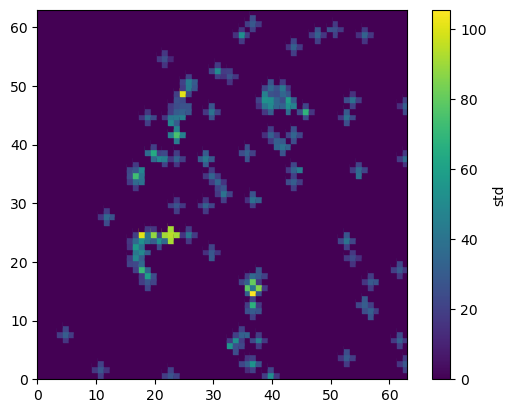

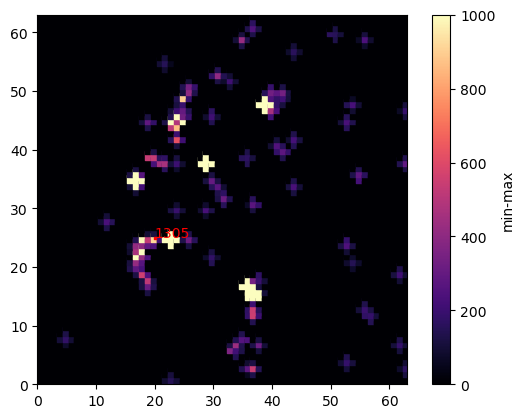

In [127]:
# allow to reload module
import importlib

%load_ext autoreload
%autoreload 2

# Recording = br.read_brw_recording("../recordings/cerebellum-slice1-01.brw", t_start = 0, t_end = 5, ch_to_extract="all")

# plot the activity map, with default arguments
Recording.plot_activity_map()
# plot the activity for defined arguments
Recording.plot_activity_map(label=[1305], t_start=1.5, t_end=2.5, method="min-max", max_range=1000, cmap="magma")

Sampling frequency: 5543.99560546875


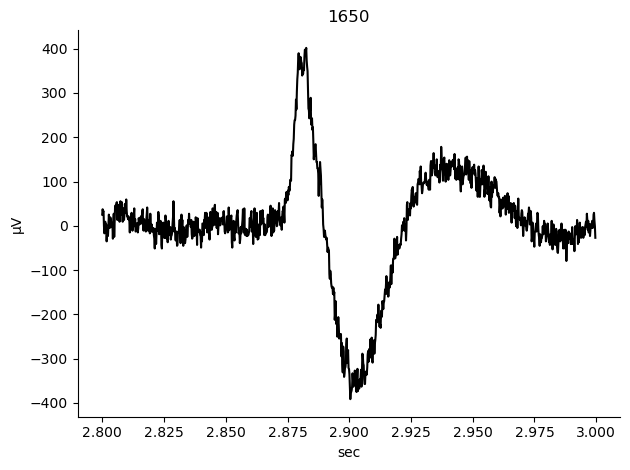

Sampling frequency: 200


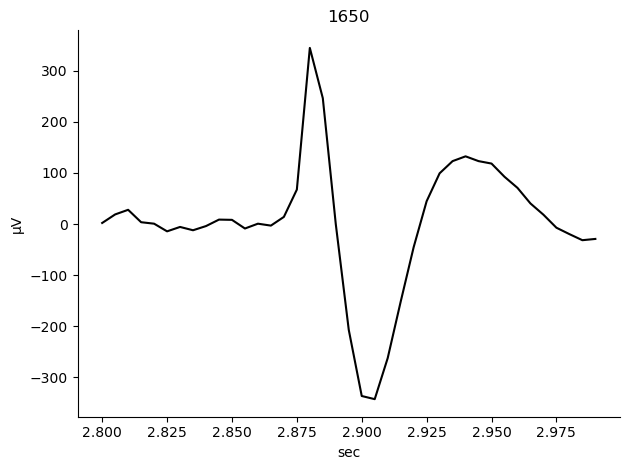

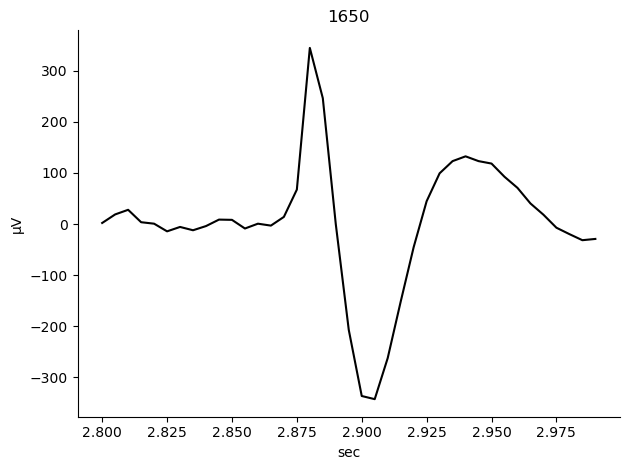

In [136]:
### down sampling
# extract channel 1650 from 2.8s to 3s
Recording = br.read_brw_recording("../recordings/13-10_hippo-slice3_gabazine17.brw", t_start=2.8, t_end=3, ch_to_extract=[1650])

print("Sampling frequency:", Recording.Info.get_sampling_rate())
# plot raw signal
Recording.plot_raw([1650])
# down sample the recording from to 200Hz, with overwrite option
Recording.down_sample(200, [1650], overwrite=True)
print("Sampling frequency:", Recording.Info.get_sampling_rate())
# plot raw signal
Recording.plot_raw([1650])


### save and load recording as pickle file
Recording.save_recording("./rec_down-sample.pickle")
# remove the Recording object
del(Recording)
# create a Recording object, loading the pickle file
Recording = br.load_recording("./rec_down-sample.pickle")
# plot raw signal
Recording.plot_raw([1650])

In [ ]:
### SpikeInterface

